In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
plt.style.use('default')
f_path = "C:/windows/Fonts/malgun.ttf"
ko_font = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')
#plt.title('테스트')

In [34]:
import pandas as pd
import numpy as np
from table_evaluator import load_data, TableEvaluator
from sdmetrics.reports.single_table import QualityReport
import sdmetrics

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [3]:
#Data Load

raw = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/캡스톤/data/rawdata.csv')

synthpop = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/캡스톤/data/synthpop_generate.csv')
ctgan = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/캡스톤/data/ctgan_generate.csv')
ctabgan = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/캡스톤/data/ctabgan_generate.csv')
ctabganplus = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/캡스톤/data/ctabganplus_generate.csv')

synthpop.drop('Unnamed: 0', axis=1, inplace=True)
ctgan.drop('Unnamed: 0', axis=1, inplace=True)
ctabgan.drop('Unnamed: 0', axis=1, inplace=True)
ctabganplus.drop('Unnamed: 0', axis=1, inplace=True)

# 1. Describe

In [4]:
raw

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득,가구서비스,노인서비스,아동서비스
0,저소득층가구,78,중등,사별,단독,다가구용단독주택,자가,3300,0,이용,이용,해당없음
1,일반가구,75,초등,사별,단독,다가구용단독주택,보증부월세,2868,2064,이용,이용,해당없음
2,일반가구,81,대학,이혼,단독,일반단독주택,자가,1872,1200,이용,이용,해당없음
3,일반가구,61,전문대,유배우,기타,다가구용단독주택,자가,6492,3216,이용,이용,해당없음
4,저소득층가구,83,초등,사별,단독,일반아파트,비가구원명의주택,1020,324,이용,이용,해당없음
...,...,...,...,...,...,...,...,...,...,...,...,...
7860,일반가구,42,전문대,유배우,기타,일반아파트,전세,4608,3630,이용,해당없음,이용
7861,일반가구,46,대학,유배우,기타,일반아파트,자가,8580,5100,미이용,해당없음,이용
7862,일반가구,47,대학,유배우,기타,일반아파트,자가,7140,5500,이용,해당없음,이용
7863,일반가구,48,대학,유배우,기타,일반아파트,전세,6744,10350,미이용,해당없음,미이용


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   저소득층여부  7865 non-null   object
 1   나이      7865 non-null   int64 
 2   교육수준    7865 non-null   object
 3   혼인상태    7865 non-null   object
 4   가구형태    7865 non-null   object
 5   주택유형    7865 non-null   object
 6   주택점유형태  7865 non-null   object
 7   총생활비    7865 non-null   int64 
 8   총소득     7865 non-null   int64 
 9   가구서비스   7865 non-null   object
 10  노인서비스   7865 non-null   object
 11  아동서비스   7865 non-null   object
dtypes: int64(3), object(9)
memory usage: 737.5+ KB


In [11]:
raw.describe(include = 'all')

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득,가구서비스,노인서비스,아동서비스
count,7865,7865.000000,7865,7865,7865,7865,7865,7.865000e+03,7865.000000,7865,7865,7865
unique,2,NaN,8,6,5,13,6,NaN,NaN,2,3,3
top,일반가구,NaN,고등,유배우,기타,일반아파트,자가,NaN,NaN,이용,이용,해당없음
freq,4404,NaN,2115,4232,4816,2890,4703,NaN,NaN,5936,4489,6642
mean,NaN,66.225429,NaN,NaN,NaN,NaN,NaN,3.957859e+03,2199.227463,NaN,NaN,NaN
std,NaN,16.304536,NaN,NaN,NaN,NaN,NaN,1.577993e+04,3431.290455,NaN,NaN,NaN
min,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,2.760000e+02,-12993.000000,NaN,NaN,NaN
25%,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,1.452000e+03,0.000000,NaN,NaN,NaN
50%,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,2.736000e+03,743.000000,NaN,NaN,NaN
75%,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,5.220000e+03,3550.000000,NaN,NaN,NaN


In [7]:
ctgan

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득,가구서비스,노인서비스,아동서비스
0,저소득층가구,70,초등,이혼,단독,일반단독주택,자가,226,116,미이용,이용,해당없음
1,저소득층가구,81,무학,사별,단독,다가구용단독주택,비가구원명의주택,530,156,이용,이용,해당없음
2,일반가구,34,대학,미혼,단독,다가구용단독주택,전세,3003,-3500,미이용,해당없음,해당없음
3,저소득층가구,76,고등,이혼,기타,다세대주택,보증부월세,2517,2624,이용,해당없음,해당없음
4,일반가구,47,대학,미혼,단독,다가구용단독주택,전세,3417,3415,미이용,해당없음,이용
...,...,...,...,...,...,...,...,...,...,...,...,...
7860,일반가구,85,대학,유배우,기타,다세대주택,자가,3145,937,이용,이용,해당없음
7861,저소득층가구,85,무학,사별,부자,영구임대아파트,보증부월세,1675,138,이용,이용,이용
7862,일반가구,37,전문대,미혼,단독,일반아파트,자가,1802,3297,미이용,해당없음,해당없음
7863,저소득층가구,85,무학,사별,단독,일반단독주택,자가,914,125,이용,이용,해당없음


In [8]:
ctgan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   저소득층여부  7865 non-null   object
 1   나이      7865 non-null   int64 
 2   교육수준    7865 non-null   object
 3   혼인상태    7865 non-null   object
 4   가구형태    7865 non-null   object
 5   주택유형    7865 non-null   object
 6   주택점유형태  7865 non-null   object
 7   총생활비    7865 non-null   int64 
 8   총소득     7865 non-null   int64 
 9   가구서비스   7865 non-null   object
 10  노인서비스   7865 non-null   object
 11  아동서비스   7865 non-null   object
dtypes: int64(3), object(9)
memory usage: 737.5+ KB


In [12]:
ctgan.describe(include = 'all')

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득,가구서비스,노인서비스,아동서비스
count,7865,7865.000000,7865,7865,7865,7865,7865,7865.000000,7865.000000,7865,7865,7865
unique,2,NaN,8,6,5,13,6,NaN,NaN,2,3,3
top,일반가구,NaN,중등,유배우,기타,일반아파트,자가,NaN,NaN,이용,이용,해당없음
freq,4026,NaN,1655,3674,4277,2290,4347,NaN,NaN,5713,4255,5193
mean,NaN,66.266116,NaN,NaN,NaN,NaN,NaN,3895.281882,2481.263700,NaN,NaN,NaN
std,NaN,17.500174,NaN,NaN,NaN,NaN,NaN,3484.103157,3030.358452,NaN,NaN,NaN
min,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,-976.000000,-3500.000000,NaN,NaN,NaN
25%,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,1243.000000,117.000000,NaN,NaN,NaN
50%,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,2555.000000,1556.000000,NaN,NaN,NaN
75%,NaN,81.000000,NaN,NaN,NaN,NaN,NaN,5908.000000,3677.000000,NaN,NaN,NaN


In [10]:
ctabganplus

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득,가구서비스,노인서비스,아동서비스
0,일반가구,64,고등,유배우,기타,일반아파트,자가,2909,3569,이용,이용,이용
1,일반가구,61,대학,유배우,기타,일반아파트,자가,5444,2933,이용,이용,해당없음
2,저소득층가구,73,초등,이혼,단독,국민공공임대아파트,보증부월세,1053,29,이용,이용,해당없음
3,저소득층가구,76,중등,이혼,단독,다가구용단독주택,월세,1612,401,이용,이용,해당없음
4,일반가구,44,고등,유배우,기타,일반아파트,자가,5311,201,미이용,해당없음,이용
...,...,...,...,...,...,...,...,...,...,...,...,...
7860,저소득층가구,89,초등,유배우,기타,일반단독주택,자가,2570,140,이용,이용,해당없음
7861,일반가구,37,전문대,미혼,단독,다가구용단독주택,보증부월세,3403,7339,미이용,해당없음,해당없음
7862,일반가구,51,대학,유배우,기타,일반아파트,자가,7596,8695,미이용,해당없음,이용
7863,일반가구,83,고등,유배우,기타,일반단독주택,자가,1499,1424,이용,이용,해당없음


In [13]:
ctabganplus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7865 entries, 0 to 7864
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   저소득층여부  7865 non-null   object
 1   나이      7865 non-null   int64 
 2   교육수준    7865 non-null   object
 3   혼인상태    7865 non-null   object
 4   가구형태    7865 non-null   object
 5   주택유형    7865 non-null   object
 6   주택점유형태  7865 non-null   object
 7   총생활비    7865 non-null   int64 
 8   총소득     7865 non-null   int64 
 9   가구서비스   7865 non-null   object
 10  노인서비스   7865 non-null   object
 11  아동서비스   7865 non-null   object
dtypes: int64(3), object(9)
memory usage: 737.5+ KB


In [14]:
ctabganplus.describe(include = 'all')

,저소득층여부,나이,교육수준,혼인상태,가구형태,주택유형,주택점유형태,총생활비,총소득,가구서비스,노인서비스,아동서비스
count,7865,7865.000000,7865,7865,7865,7865,7865,7865.000000,7865.000000,7865,7865,7865
unique,2,NaN,8,6,5,13,6,NaN,NaN,2,3,3
top,일반가구,NaN,고등,유배우,기타,일반아파트,자가,NaN,NaN,이용,이용,해당없음
freq,4397,NaN,2333,4118,4671,2966,4847,NaN,NaN,5793,4511,6828
mean,NaN,65.207120,NaN,NaN,NaN,NaN,NaN,3528.462428,2124.970757,NaN,NaN,NaN
std,NaN,15.632753,NaN,NaN,NaN,NaN,NaN,3131.632168,2844.355676,NaN,NaN,NaN
min,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,276.000000,-9707.000000,NaN,NaN,NaN
25%,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,1314.000000,40.000000,NaN,NaN,NaN
50%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,2463.000000,815.000000,NaN,NaN,NaN
75%,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,5038.000000,3456.000000,NaN,NaN,NaN


In [21]:
a = len(raw[raw['총생활비'] < 0])
b = len(ctgan[ctgan['총생활비'] < 0])
c = len(ctabganplus[ctabganplus['총생활비'] < 0])

print(f'원본데이터에서 총생활비 음수 가지는 경우 : {a}')
print(f'CTGAN 재현 데이터에서 총생활비 음수 가지는 경우 : {b}')
print(f'CTABGAN+ 재현 데이터에서 총생활비 음수 가지는 경우 : {c}')

원본데이터에서 총생활비 음수 가지는 경우 : 0
CTGAN 재현 데이터에서 총생활비 음수 가지는 경우 : 131
CTABGAN+ 재현 데이터에서 총생활비 음수 가지는 경우 : 0


# 2. Visualize

In [22]:
categorical_features = [
    '저소득층여부',
    '교육수준',
    '혼인상태',
    '가구형태',
    '주택유형',
    '주택점유형태',
    '가구서비스',
    '노인서비스',
    '아동서비스'
]

### CTGAN

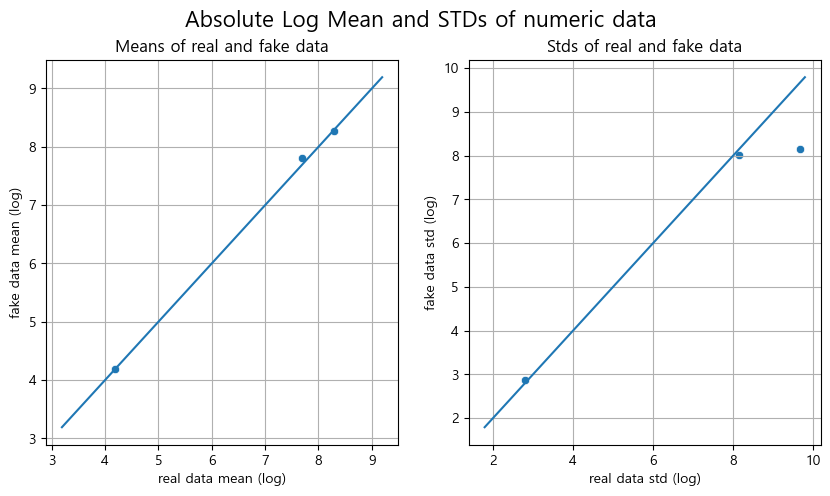

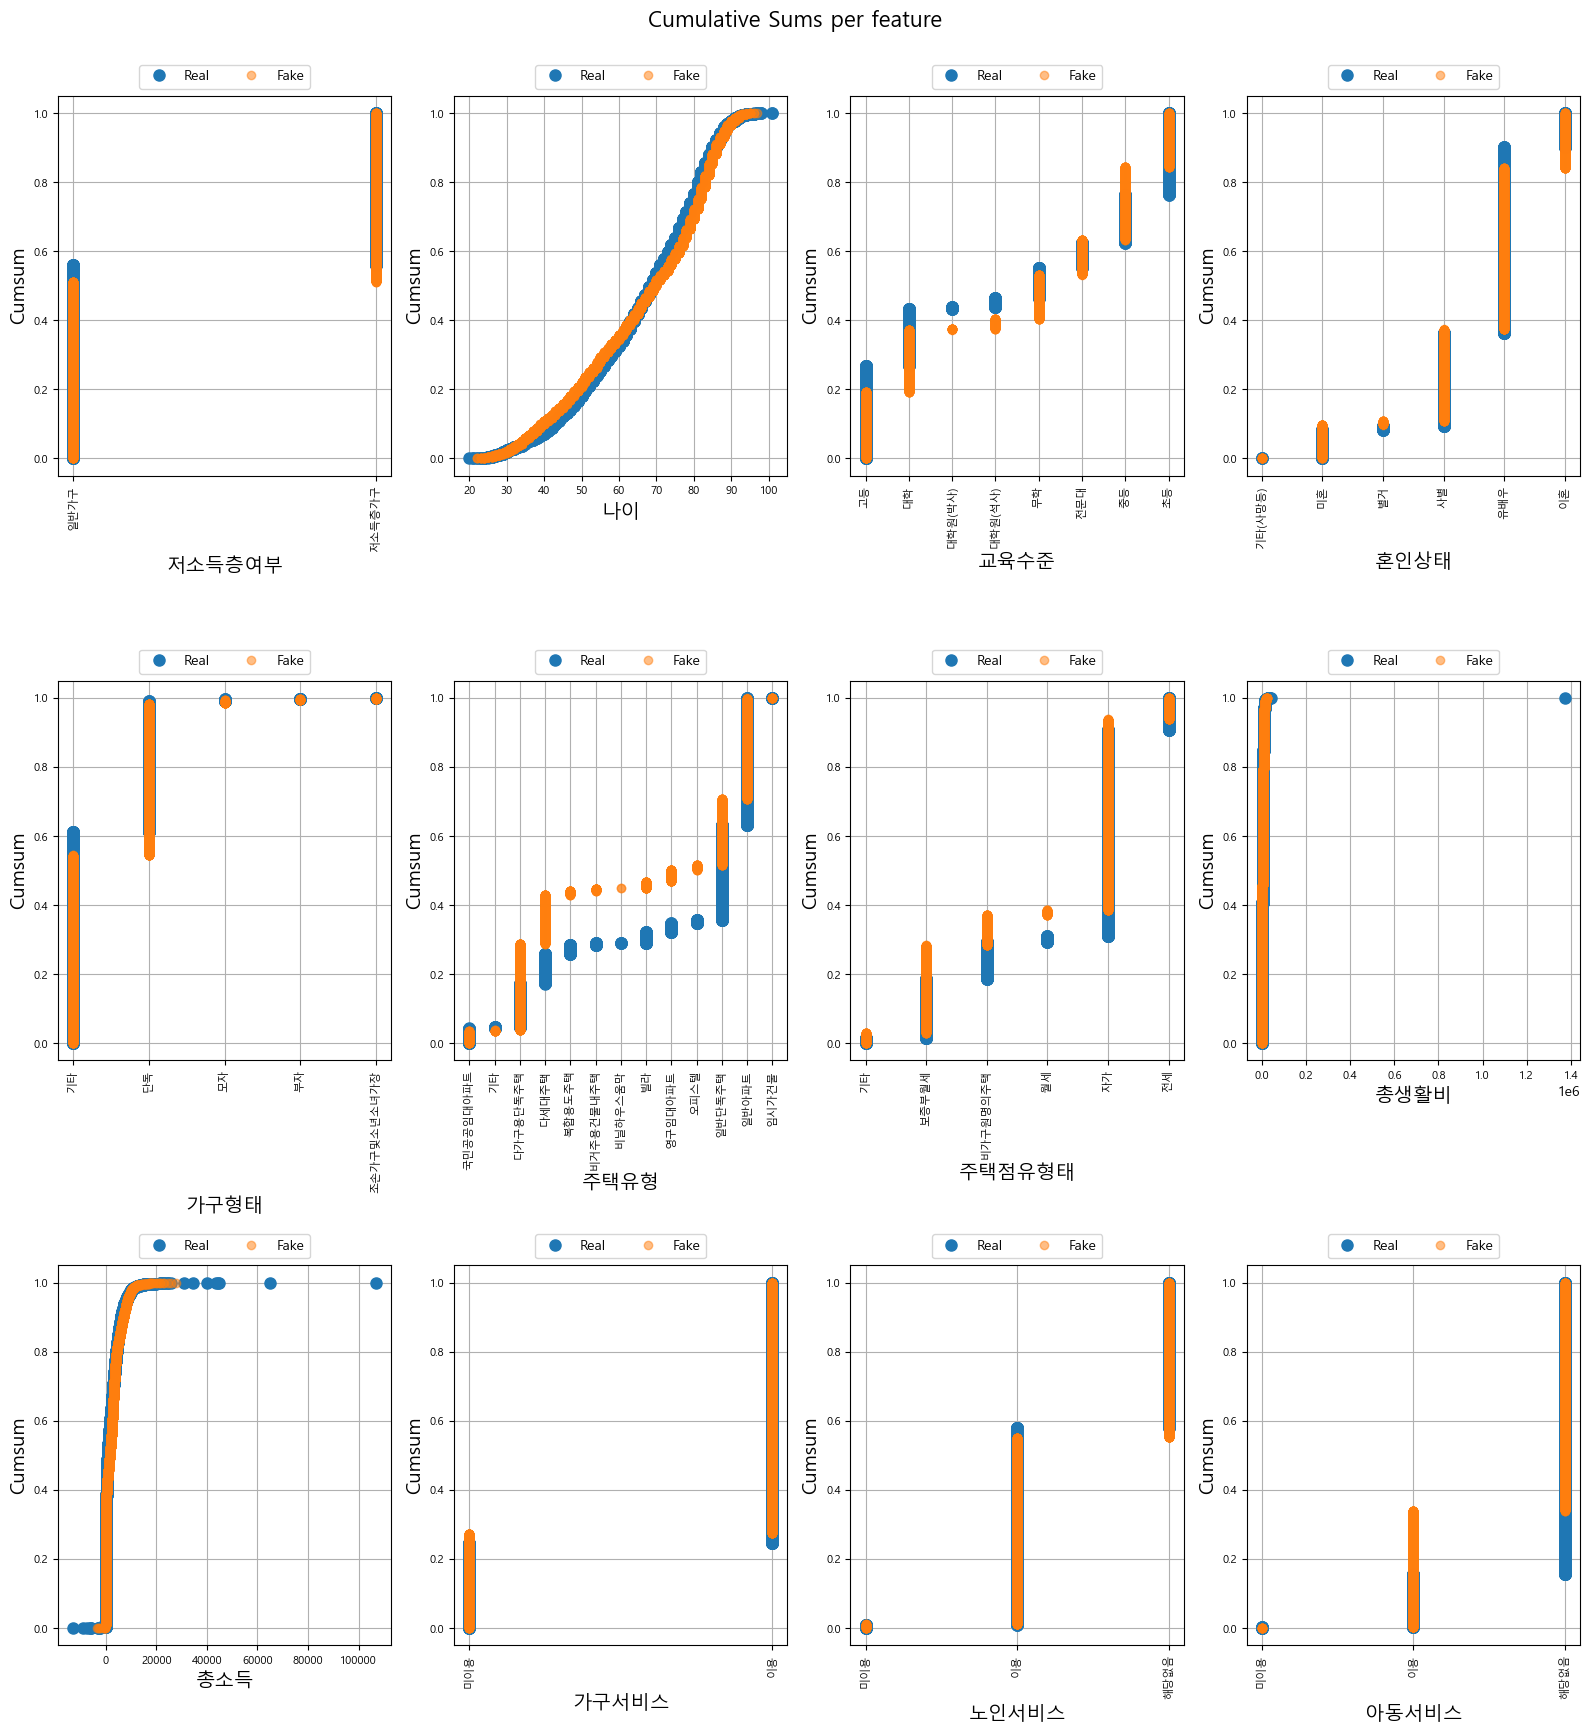

C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of tick

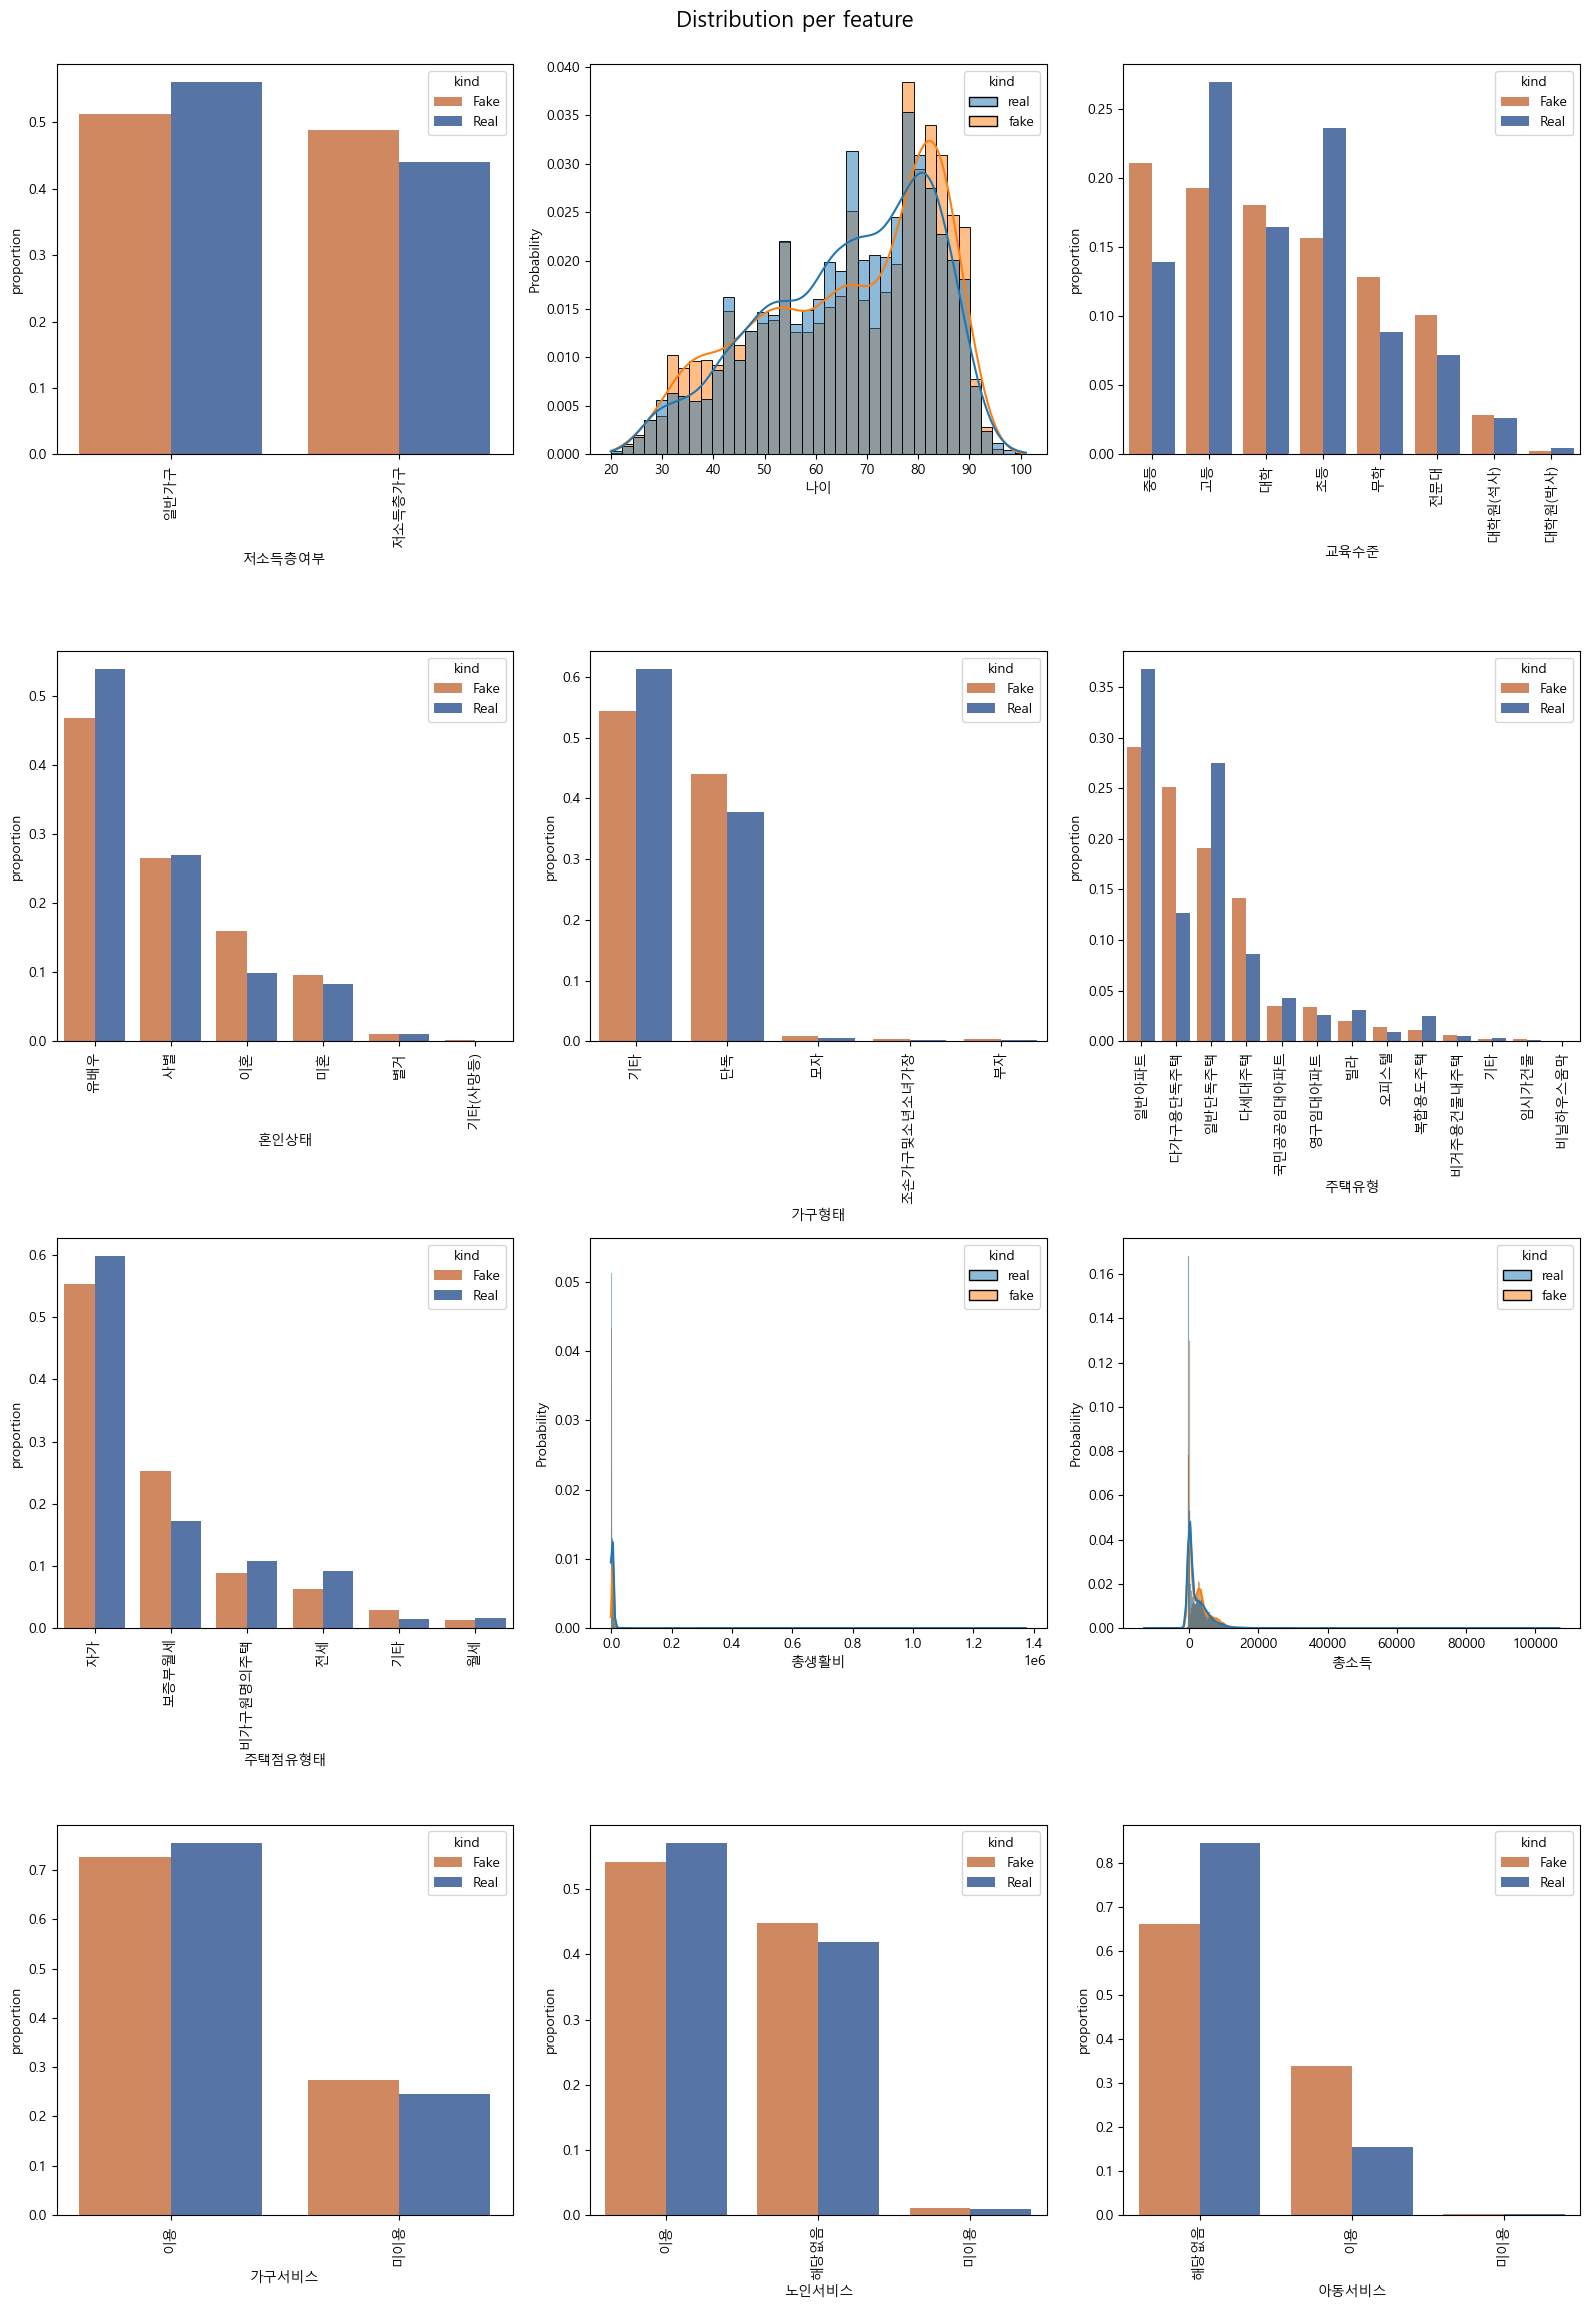

C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


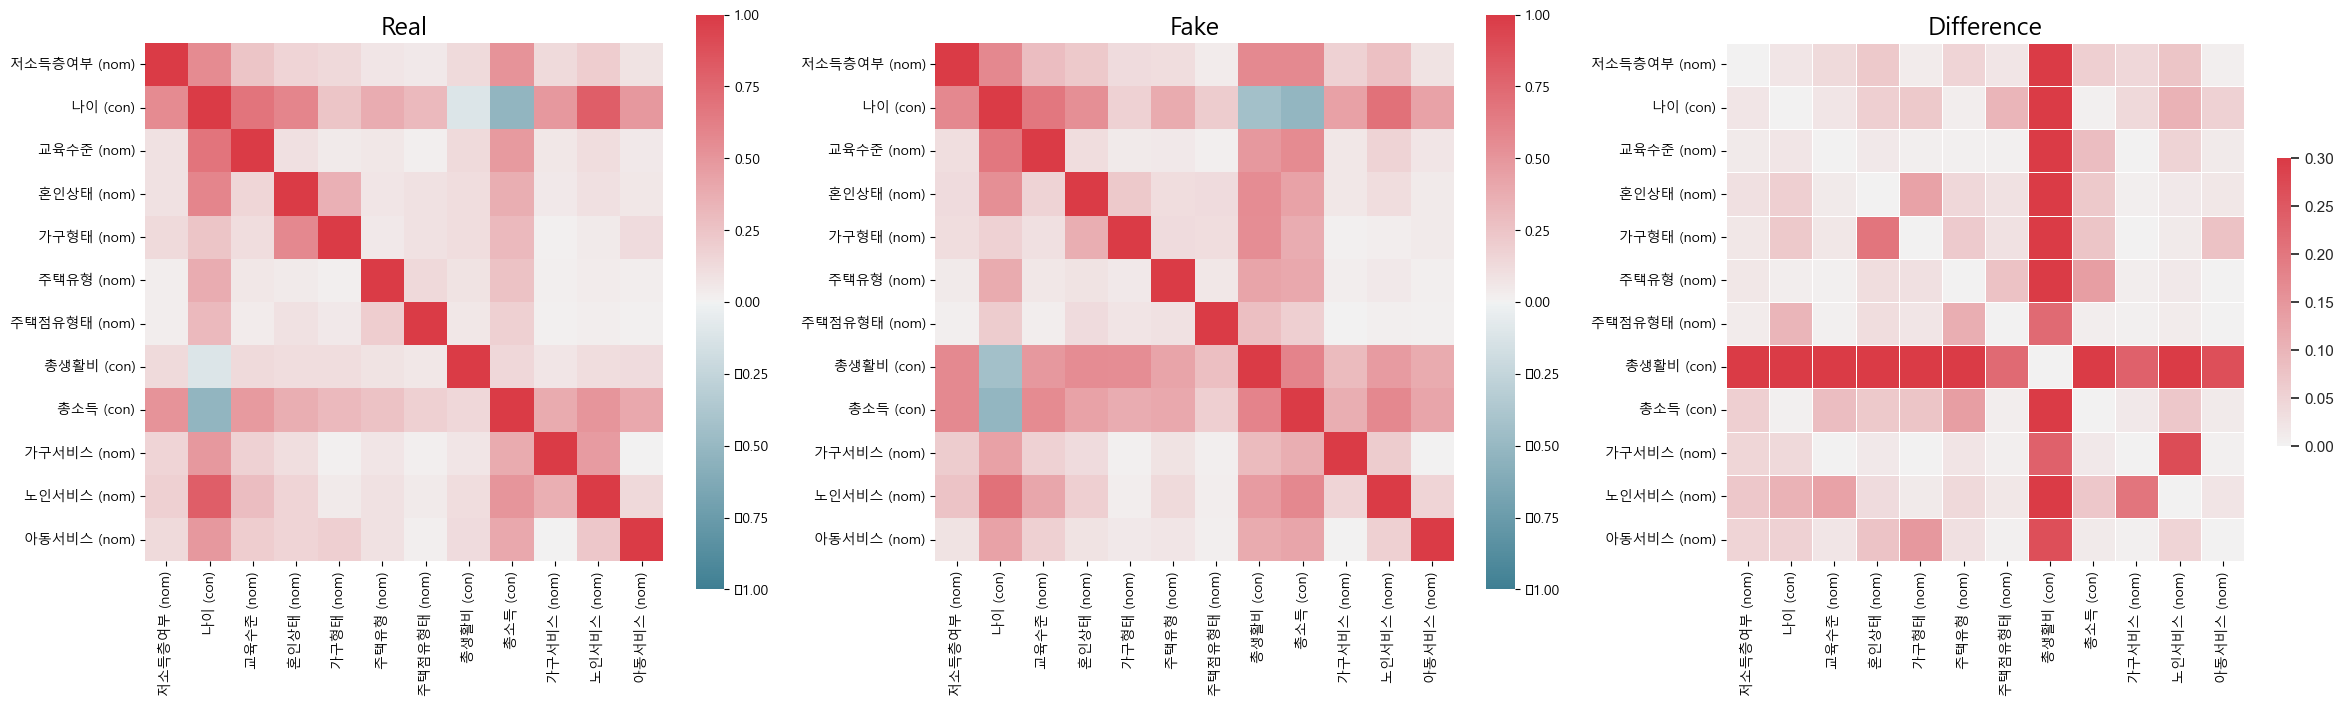

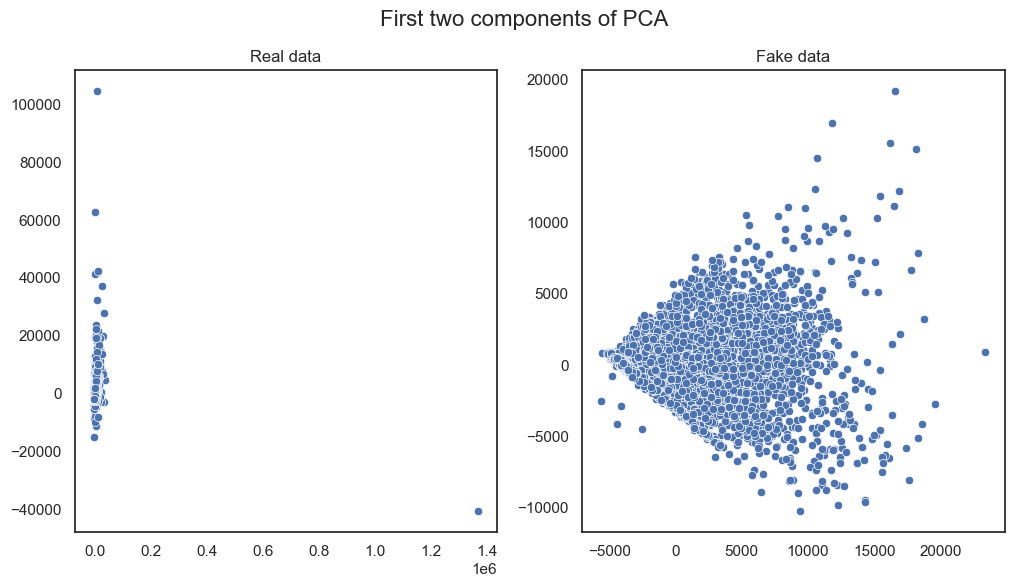

In [23]:
ctgan_table_evaluator =  TableEvaluator(raw, ctgan, cat_cols= categorical_features)
ctgan_table_evaluator.visual_evaluation()

### CTABGAN+

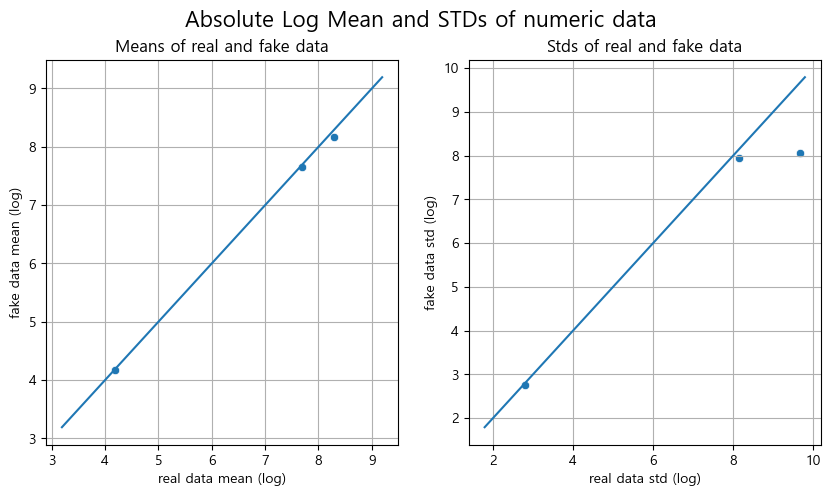

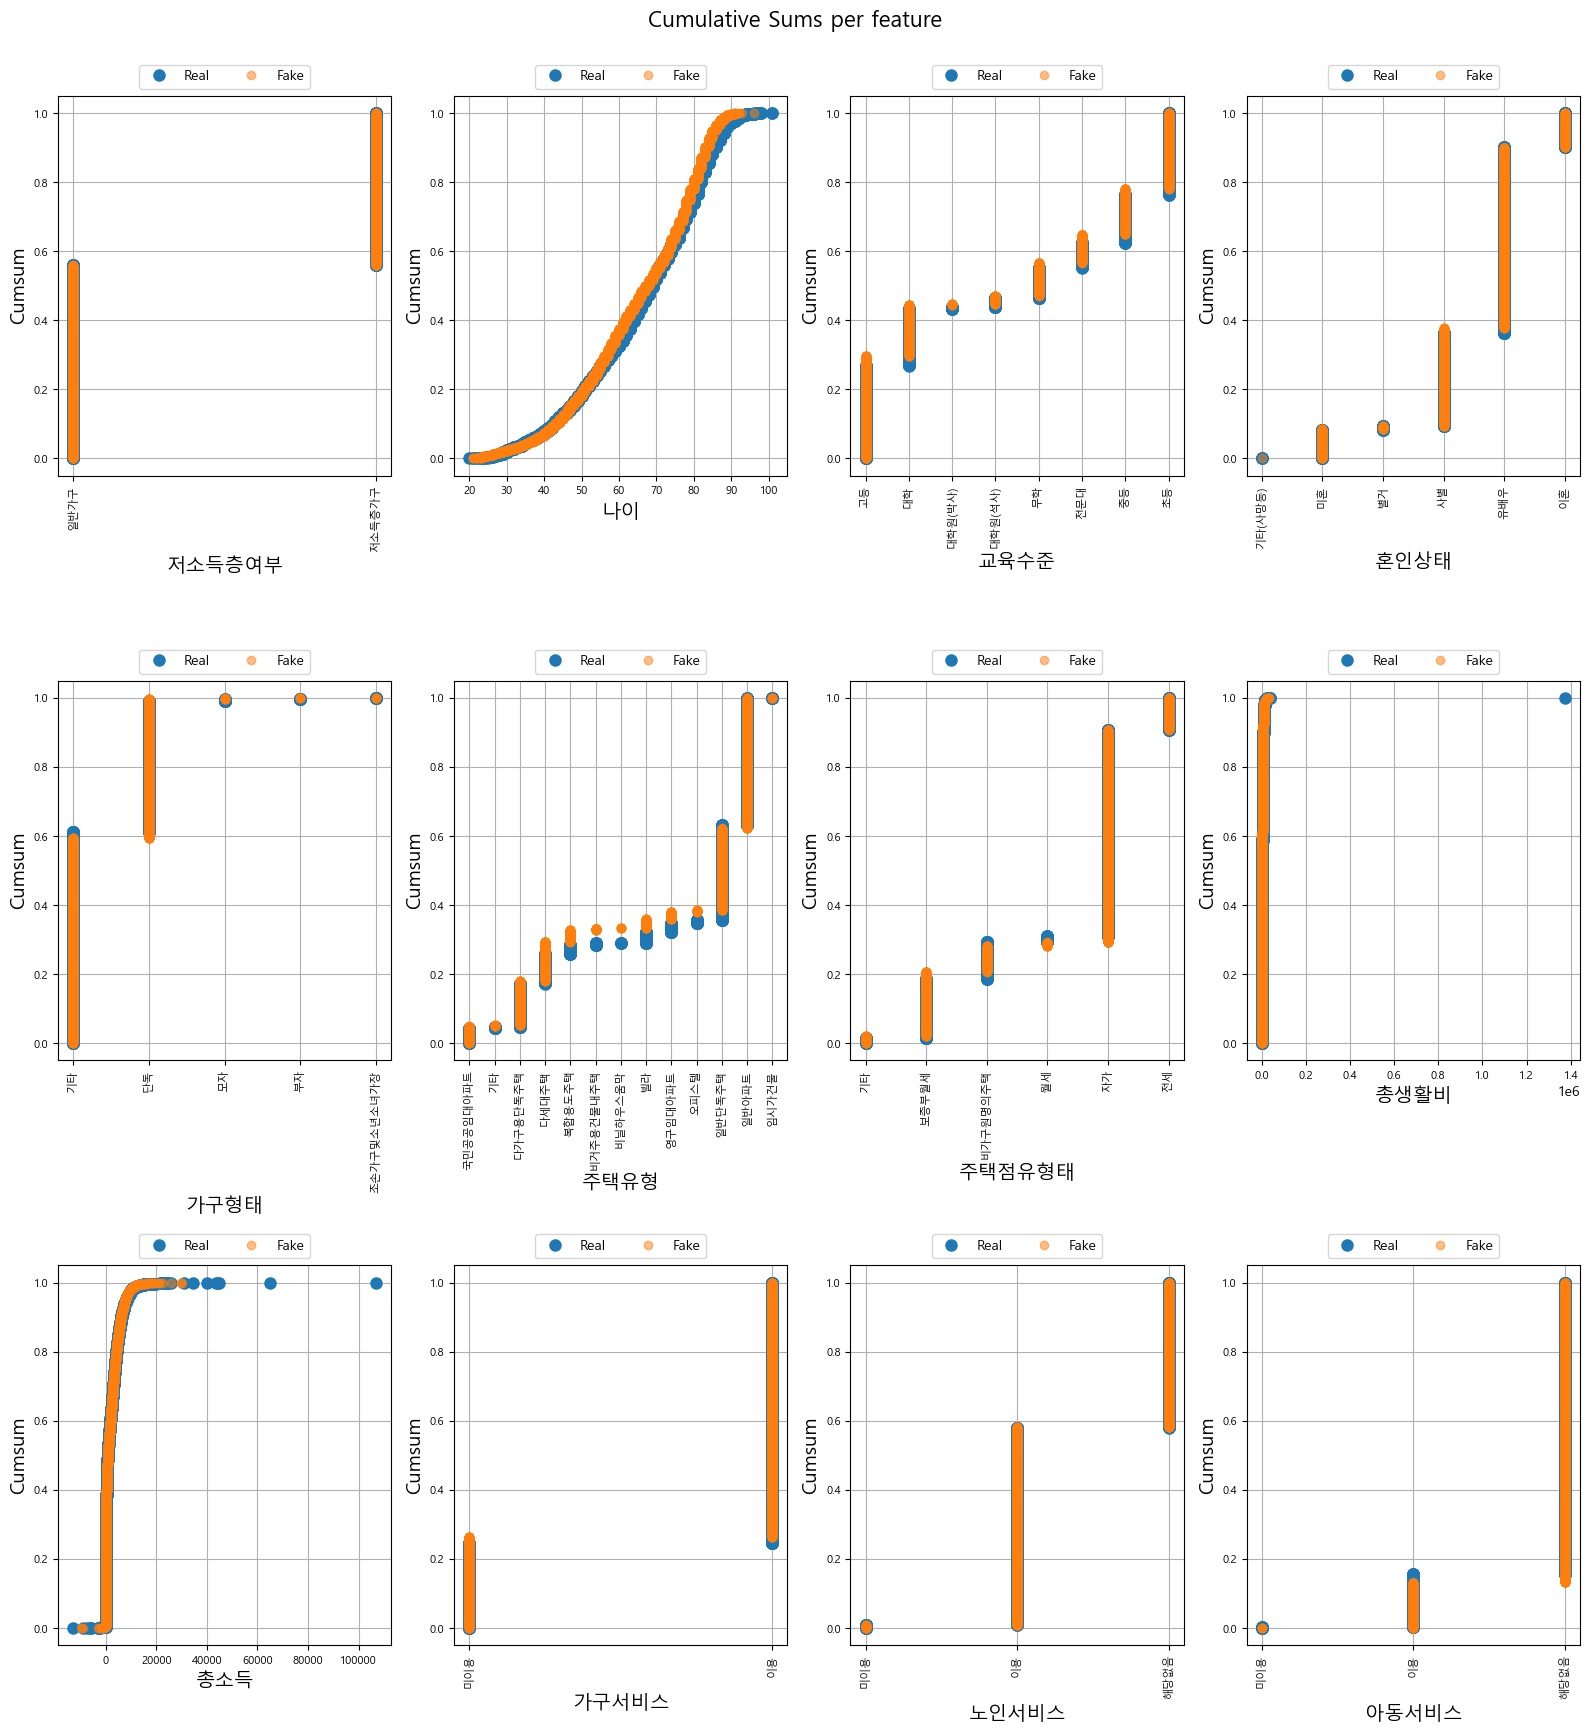

C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
C:\Users\82102\anaconda3\lib\site-packages\table_evaluator\table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of tick

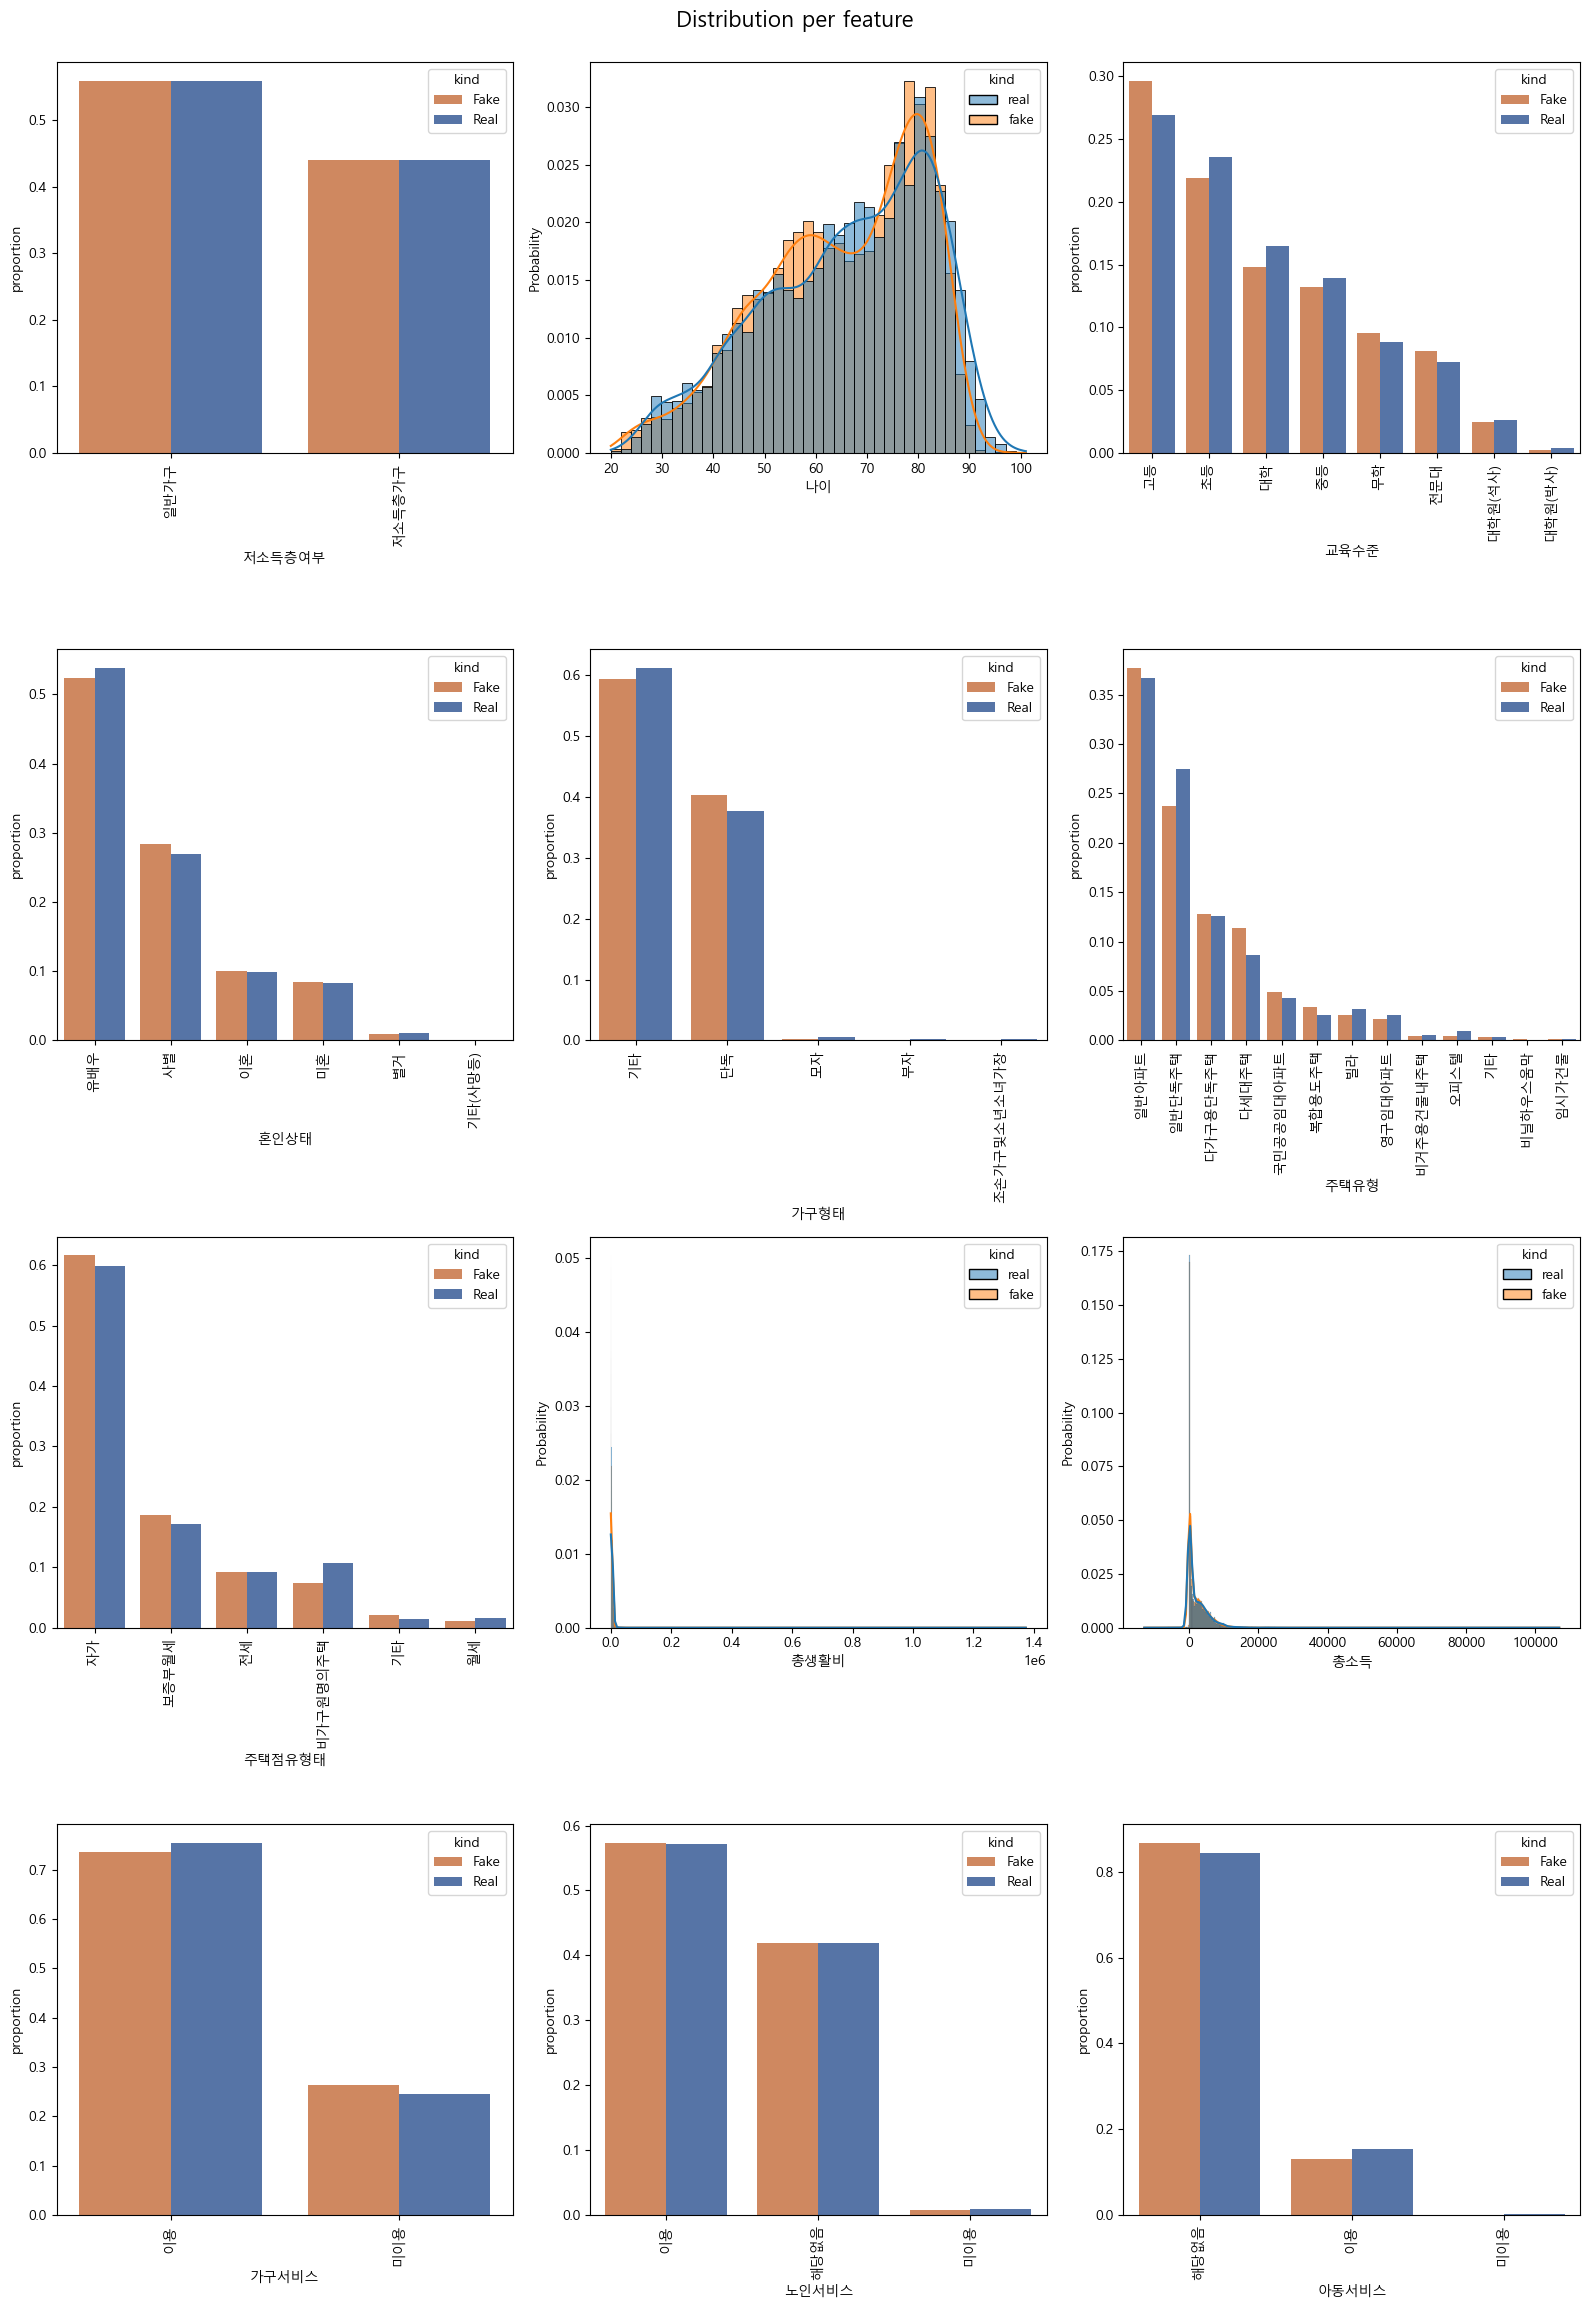

C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82102\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


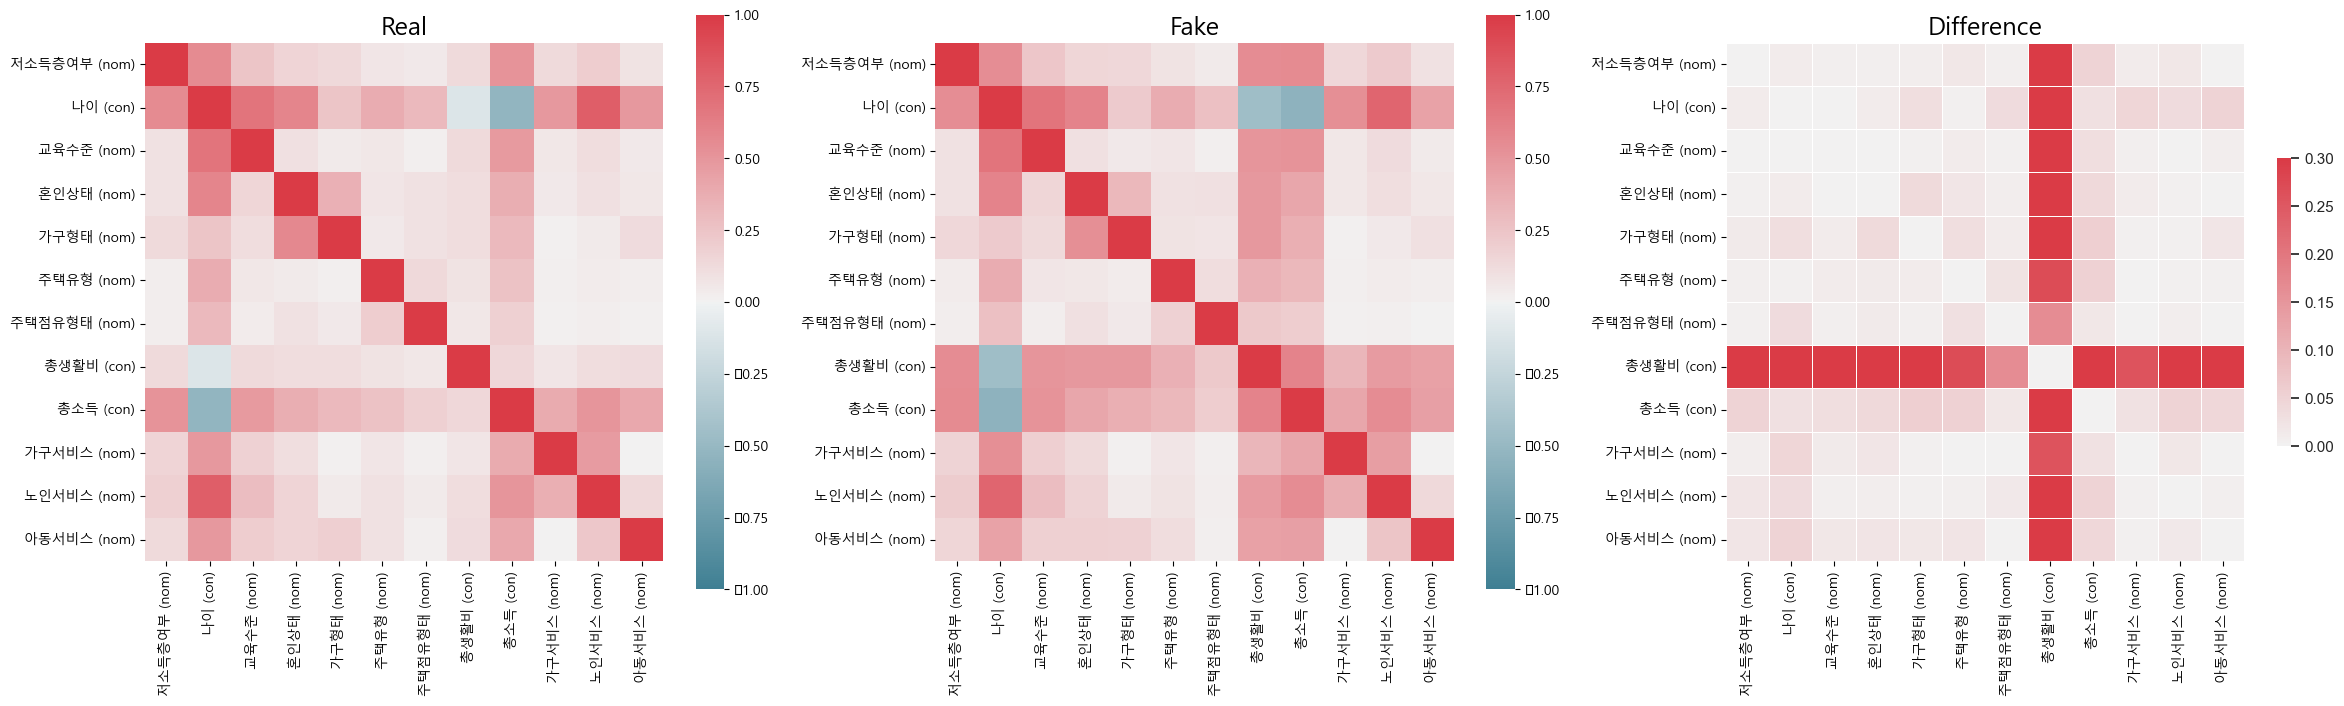

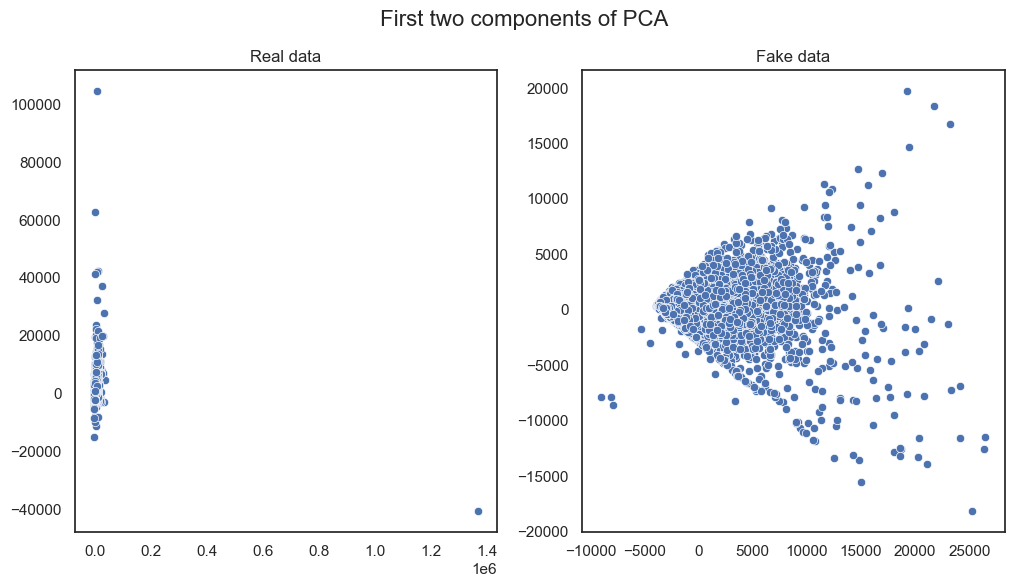

In [26]:
ctabganplus_table_evaluator =  TableEvaluator(raw, ctabganplus, cat_cols= categorical_features)
ctabganplus_table_evaluator.visual_evaluation()

# 3. 통계적 유사성

In [28]:
metadata = {
    #"primary_key": "user_id",
    "columns": {
        "저소득층여부": {
            "sdtype": "object",
        },
        "나이": {
            "sdtype": "numerical"
        },
        "교육수준": {
            "sdtype": "categorical",
        }, 
        "혼인상태": {
            "sdtype": "categorical"
        },
        "가구형태": {
            "sdtype": "categorical"
        },
        "주택유형": {
            "sdtype": "categorical"
        },
        "주택점유형태": {
            "sdtype": "categorical"
        },
        "총생활비": {
            "sdtype": "numerical"
        },
        "총소득": {
            "sdtype": "numerical"
        },
        "가구서비스": {
            "sdtype": "categorical"
        },
        "노인서비스": {
            "sdtype": "categorical"
        },
        "아동서비스": {
            "sdtype": "categorical"
        }
    }
}

In [29]:
ctgan_report = QualityReport()
ctabganplus_report = QualityReport()

### CTGAN

In [30]:
ctgan_report.generate(raw, ctgan, metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|███████████████████████████████████████████| 66/66 [00:01<00:00, 60.41it/s]

Overall Quality Score: 80.31%

Properties:
- Column Shapes: 88.85%
- Column Pair Trends: 71.78%


### CTABGAN+

In [31]:
ctabganplus_report.generate(raw, ctabganplus, metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|███████████████████████████████████████████| 66/66 [00:01<00:00, 60.88it/s]

Overall Quality Score: 85.3%

Properties:
- Column Shapes: 95.29%
- Column Pair Trends: 75.3%


# 4. KS test and TVtest

### CTGAN

In [32]:
ctgan_report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,나이,KSComplement,0.946090
1,교육수준,TVComplement,0.841831
2,혼인상태,TVComplement,0.924603
3,가구형태,TVComplement,0.931469
4,주택유형,TVComplement,0.804959
5,주택점유형태,TVComplement,0.903369
6,총생활비,KSComplement,0.904895
7,총소득,KSComplement,0.759059
8,가구서비스,TVComplement,0.971647
9,노인서비스,TVComplement,0.970248


### CTABGAN+

In [33]:
ctabganplus_report.get_details(property_name='Column Shapes')

,Column,Metric,Score
0,나이,KSComplement,0.951685
1,교육수준,TVComplement,0.955880
2,혼인상태,TVComplement,0.983598
3,가구형태,TVComplement,0.974571
4,주택유형,TVComplement,0.946217
5,주택점유형태,TVComplement,0.960966
6,총생활비,KSComplement,0.948633
7,총소득,KSComplement,0.804959
8,가구서비스,TVComplement,0.981818
9,노인서비스,TVComplement,0.997203


# 5. 머신러닝 유효성

### train set 생성

In [42]:
# 학습데이터, taget 분리

X_raw = raw.drop(['저소득층여부'], axis = 1)
Y_raw = raw['저소득층여부']

# 범주형 변수 One-hot Encoding, 수치형 변수는 Scaling

cate_X_raw = X_raw[['교육수준','혼인상태','가구형태','주택유형','주택점유형태','가구서비스','노인서비스','아동서비스']]
conti_X_raw = X_raw[['나이','총생활비','총소득']]

cate_X_raw_dummy=pd.get_dummies(cate_X_raw)

scaler_X_raw=StandardScaler()
conti_X_raw_st=scaler_X_raw.fit_transform(conti_X_raw)

conti_X_raw_st=pd.DataFrame(conti_X_raw_st, columns=conti_X_raw.columns)

cate_X_raw_dummy.reset_index(inplace=True, drop=True)
conti_X_raw_st.reset_index(inplace=True, drop=True)
Y_raw.reset_index(inplace=True, drop=True)

# train set
train_set_raw=pd.concat([conti_X_raw_st,cate_X_raw_dummy], axis=1)

X_raw_train , X_raw_test, Y_raw_train , Y_raw_test = train_test_split(train_set_raw, Y_raw, test_size=0.2, random_state=0)

# target 일반가구 :1, 저소득층 : 0 으로 변환
Y_raw_train = Y_raw_train.replace({'일반가구':1, '저소득층가구':0})
Y_raw_test = Y_raw_test.replace({'일반가구':1, '저소득층가구':0})

In [43]:
# 학습데이터, taget 분리

X_ctgan = ctgan.drop(['저소득층여부'], axis = 1)
Y_ctgan = ctgan['저소득층여부']

# 범주형 변수 One-hot Encoding, 수치형 변수는 Scaling

cate_X_ctgan = X_ctgan[['교육수준','혼인상태','가구형태','주택유형','주택점유형태','가구서비스','노인서비스','아동서비스']]
conti_X_ctgan = X_ctgan[['나이','총생활비','총소득']]

cate_X_ctgan_dummy=pd.get_dummies(cate_X_ctgan)

scaler_X_ctgan=StandardScaler()
conti_X_ctgan_st=scaler_X_ctgan.fit_transform(conti_X_ctgan)

conti_X_ctgan_st=pd.DataFrame(conti_X_ctgan_st, columns=conti_X_ctgan.columns)

cate_X_ctgan_dummy.reset_index(inplace=True, drop=True)
conti_X_ctgan_st.reset_index(inplace=True, drop=True)
Y_ctgan.reset_index(inplace=True, drop=True)

# train set
train_set_ctgan=pd.concat([conti_X_ctgan_st,cate_X_ctgan_dummy], axis=1)

X_ctgan_train , X_ctgan_test, Y_ctgan_train , Y_ctgan_test = train_test_split(train_set_ctgan, Y_ctgan, test_size=0.2, random_state=0)

# target 일반가구 :1, 저소득층 : 0 으로 변환
Y_ctgan_train = Y_ctgan_train.replace({'일반가구':1, '저소득층가구':0})
Y_ctgan_test = Y_ctgan_test.replace({'일반가구':1, '저소득층가구':0})

In [44]:
# 학습데이터, taget 분리

X_ctabganplus = ctabganplus.drop(['저소득층여부'], axis = 1)
Y_ctabganplus = ctabganplus['저소득층여부']

# 범주형 변수 One-hot Encoding, 수치형 변수는 Scaling

cate_X_ctabganplus = X_ctabganplus[['교육수준','혼인상태','가구형태','주택유형','주택점유형태','가구서비스','노인서비스','아동서비스']]
conti_X_ctabganplus = X_ctabganplus[['나이','총생활비','총소득']]

cate_X_ctabganplus_dummy=pd.get_dummies(cate_X_ctabganplus)

scaler_X_ctabganplus=StandardScaler()
conti_X_ctabganplus_st=scaler_X_ctabganplus.fit_transform(conti_X_ctabganplus)

conti_X_ctabganplus_st=pd.DataFrame(conti_X_ctabganplus_st, columns=conti_X_ctabganplus.columns)

cate_X_ctabganplus_dummy.reset_index(inplace=True, drop=True)
conti_X_ctabganplus_st.reset_index(inplace=True, drop=True)
Y_ctabganplus.reset_index(inplace=True, drop=True)

# train set
train_set_ctabganplus=pd.concat([conti_X_ctabganplus_st,cate_X_ctabganplus_dummy], axis=1)

X_ctabganplus_train , X_ctabganplus_test, Y_ctabganplus_train , Y_ctabganplus_test = train_test_split(train_set_ctabganplus, Y_ctabganplus, test_size=0.2, random_state=0)

# target 일반가구 :1, 저소득층 : 0 으로 변환
Y_ctabganplus_train = Y_ctabganplus_train.replace({'일반가구':1, '저소득층가구':0})
Y_ctabganplus_test = Y_ctabganplus_test.replace({'일반가구':1, '저소득층가구':0})

## 1. Logistic Reggression

### 원본데이터

In [45]:
model_log_raw = LogisticRegression(penalty = 'l2', solver='saga', random_state=0) 
model_log_raw.fit(X_raw_train, Y_raw_train) # 모델 학습

Y_pred_raw= model_log_raw.predict(X_raw_test) # 예측 라벨
print(classification_report(Y_raw_test, Y_pred_raw))

roc_auc_raw = roc_auc_score(Y_raw_test, Y_pred_raw) 
print("ROC AUC Score: {}".format(roc_auc_raw))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       696
           1       0.91      0.85      0.88       877

    accuracy                           0.87      1573
   macro avg       0.86      0.87      0.87      1573
weighted avg       0.87      0.87      0.87      1573

ROC AUC Score: 0.8688572261759656


C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### CTGAN

In [46]:
model_log_ctgan = LogisticRegression(penalty = 'l2', solver='saga', random_state=0) 
model_log_ctgan.fit(X_ctgan_train, Y_ctgan_train) # 모델 학습

Y_pred_ctgan= model_log_ctgan.predict(X_ctgan_test) # 예측 라벨
print(classification_report(Y_ctgan_test, Y_pred_ctgan))

roc_auc_ctgan = roc_auc_score(Y_ctgan_test, Y_pred_ctgan) 
print("ROC AUC Score: {}".format(roc_auc_ctgan))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       789
           1       0.86      0.85      0.86       784

    accuracy                           0.86      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.86      0.86      0.86      1573

ROC AUC Score: 0.8569294638007294


C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### CTABGAN+

In [47]:
model_log_ctabganplus = LogisticRegression(penalty = 'l2', solver='saga', random_state=0) 
model_log_ctabganplus.fit(X_ctabganplus_train, Y_ctabganplus_train) # 모델 학습

Y_pred_ctabganplus= model_log_ctabganplus.predict(X_ctabganplus_test) # 예측 라벨
print(classification_report(Y_ctabganplus_test, Y_pred_ctabganplus))

roc_auc_ctabganplus = roc_auc_score(Y_ctabganplus_test, Y_pred_ctabganplus) 
print("ROC AUC Score: {}".format(roc_auc_ctabganplus))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       753
           1       0.88      0.84      0.86       820

    accuracy                           0.86      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.86      0.86      0.86      1573

ROC AUC Score: 0.8575421889677063


C:\Users\82102\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## 2. Random Forest

### 원본데이터

In [48]:
model_rf_raw = RandomForestClassifier(random_state=0) 
model_rf_raw.fit(X_raw_train, Y_raw_train) # 모델 학습

Y_pred_raw= model_rf_raw.predict(X_raw_test) # 예측 라벨
print(classification_report(Y_raw_test, Y_pred_raw))

roc_auc_raw = roc_auc_score(Y_raw_test, Y_pred_raw) 
print("ROC AUC Score: {}".format(roc_auc_raw))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       696
           1       0.91      0.92      0.92       877

    accuracy                           0.90      1573
   macro avg       0.90      0.90      0.90      1573
weighted avg       0.90      0.90      0.90      1573

ROC AUC Score: 0.9024716903235953


### CTGAN

In [49]:
model_rf_ctgan = RandomForestClassifier(random_state=0) 
model_rf_ctgan.fit(X_ctgan_train, Y_ctgan_train) # 모델 학습

Y_pred_ctgan= model_rf_ctgan.predict(X_ctgan_test) # 예측 라벨
print(classification_report(Y_ctgan_test, Y_pred_ctgan))

roc_auc_ctgan = roc_auc_score(Y_ctgan_test, Y_pred_ctgan) 
print("ROC AUC Score: {}".format(roc_auc_ctgan))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       789
           1       0.85      0.84      0.85       784

    accuracy                           0.85      1573
   macro avg       0.85      0.85      0.85      1573
weighted avg       0.85      0.85      0.85      1573

ROC AUC Score: 0.8480291831561522


### CTABGAN+

In [50]:
model_rf_raw = RandomForestClassifier(random_state=0) 
model_rf_raw.fit(X_raw_train, Y_raw_train) # 모델 학습

Y_pred_raw= model_rf_raw.predict(X_raw_test) # 예측 라벨
print(classification_report(Y_raw_test, Y_pred_raw))

roc_auc_raw = roc_auc_score(Y_raw_test, Y_pred_raw) 
print("ROC AUC Score: {}".format(roc_auc_raw))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       696
           1       0.91      0.92      0.92       877

    accuracy                           0.90      1573
   macro avg       0.90      0.90      0.90      1573
weighted avg       0.90      0.90      0.90      1573

ROC AUC Score: 0.9024716903235953


## 3. SVM

### 원본데이터

In [51]:
model_svc_raw = SVC(kernel = 'rbf', probability=True, random_state = 0) 
model_svc_raw.fit(X_raw_train, Y_raw_train) # 모델 학습

Y_pred_raw= model_svc_raw.predict(X_raw_test) # 예측 라벨
print(classification_report(Y_raw_test, Y_pred_raw))

roc_auc_raw = roc_auc_score(Y_raw_test, Y_pred_raw) 
print("ROC AUC Score: {}".format(roc_auc_raw))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       696
           1       0.91      0.87      0.89       877

    accuracy                           0.88      1573
   macro avg       0.88      0.88      0.88      1573
weighted avg       0.88      0.88      0.88      1573

ROC AUC Score: 0.8814229216634556


### CTGAN

In [52]:
model_svc_ctgan = SVC(kernel = 'rbf', probability=True, random_state = 0) 
model_svc_ctgan.fit(X_ctgan_train, Y_ctgan_train) # 모델 학습

Y_pred_ctgan= model_svc_ctgan.predict(X_ctgan_test) # 예측 라벨
print(classification_report(Y_ctgan_test, Y_pred_ctgan))

roc_auc_ctgan = roc_auc_score(Y_ctgan_test, Y_pred_ctgan) 
print("ROC AUC Score: {}".format(roc_auc_ctgan))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       789
           1       0.87      0.84      0.85       784

    accuracy                           0.85      1573
   macro avg       0.85      0.85      0.85      1573
weighted avg       0.85      0.85      0.85      1573

ROC AUC Score: 0.8543622772302839


### CTABGAN+

In [53]:
model_svc_ctabganplus = SVC(kernel = 'rbf', probability=True, random_state = 0) 
model_svc_ctabganplus.fit(X_ctabganplus_train, Y_ctabganplus_train) # 모델 학습

Y_pred_ctabganplus= model_svc_ctabganplus.predict(X_ctabganplus_test) # 예측 라벨
print(classification_report(Y_ctabganplus_test, Y_pred_ctabganplus))

roc_auc_ctabganplus = roc_auc_score(Y_ctabganplus_test, Y_pred_ctabganplus) 
print("ROC AUC Score: {}".format(roc_auc_ctabganplus))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       753
           1       0.88      0.86      0.87       820

    accuracy                           0.86      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.86      0.86      0.86      1573

ROC AUC Score: 0.8640324879344411
